In [1]:
import cv2
import matplotlib.pyplot as plt

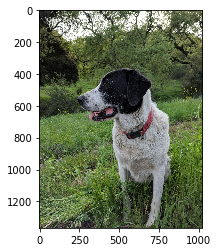

In [2]:
sammy = cv2.imread('../../notebooks/DATA/sammy.jpg')
sammy = cv2.cvtColor(sammy, code=cv2.COLOR_BGR2RGB)

plt.imshow(sammy)

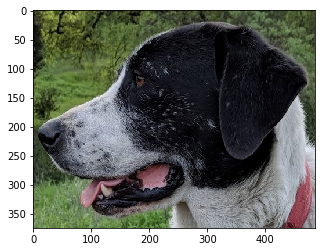

In [3]:
sammy_face = cv2.imread('../../notebooks/DATA/sammy_face.jpg')
sammy_face = cv2.cvtColor(sammy_face, code=cv2.COLOR_BGR2RGB)

plt.imshow(sammy_face)

In [8]:
# Quick note about 'eval' function. This 'eval' function evaluate strings if that string matches with
# builtin functions in Python or whatever available functions. If there's a builtin function 'eval'
# return that function.
print(sum([1, 2, 3]))
# With 'eval' function.
myfunc = eval('sum')
print(myfunc([4, 5, 6]))
# Now here, 'myfunc' works as 'sum' function.

6
15


In [10]:
# All the 6 methods that use to do template matching in different ways in OpenCV.
methods = ['cv2.TM_CCOEFF',
           'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

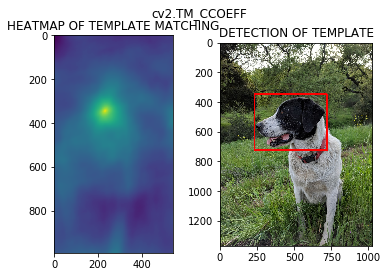

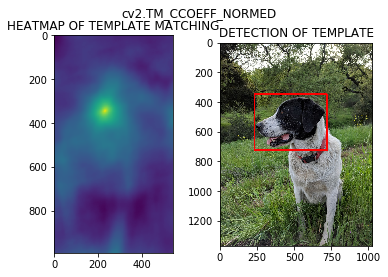

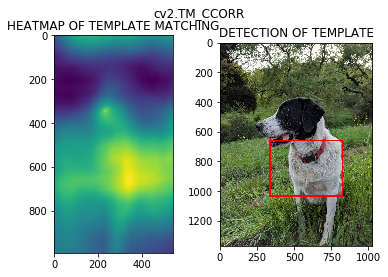

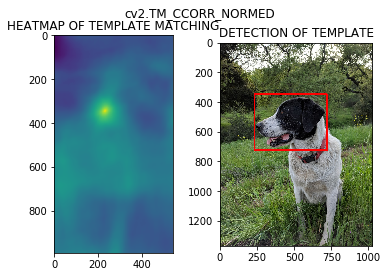

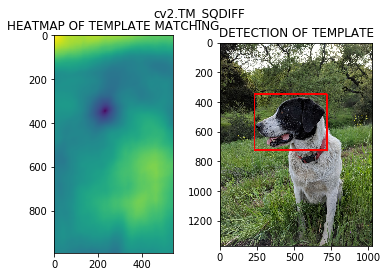

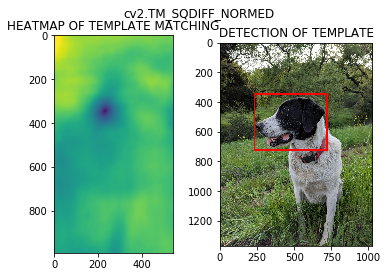

In [18]:
for m in methods:

    sammy_copy = sammy.copy()

    method = eval(m)

    # Template matching.
    result = cv2.matchTemplate(sammy_copy, sammy_face, method=method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        # This is because, these two methods highlight the matching area with 'min' values.
        # These are tuples essentially include, top-left x and y coordinates (x, y).
        top_left = min_loc
    else:
        top_left = max_loc

    # In order to draw a rectangle around matching area, get bottom right location.
    height, width, channels = sammy_face.shape
    # So, the bottom-right location details.
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(sammy_copy, top_left, bottom_right, color=(255, 0, 0), thickness=10)

    # Show the heatmap and matched portion highlighted with rectangle.
    # This 'subplot(121)' says, get a plot 1 row by 2 columns and focus to 1st column.
    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')

    # This 'subplot(122)' says, get a plot 1 row by 2 columns and focus to 2nd column.
    plt.subplot(122)
    plt.imshow(sammy_copy)
    plt.title('DETECTION OF TEMPLATE')
    # Title with the method uses.
    plt.suptitle(m)
    plt.show()


Text(0.5, 1.0, 'cv2.TM_SQDIFF_NORMED')

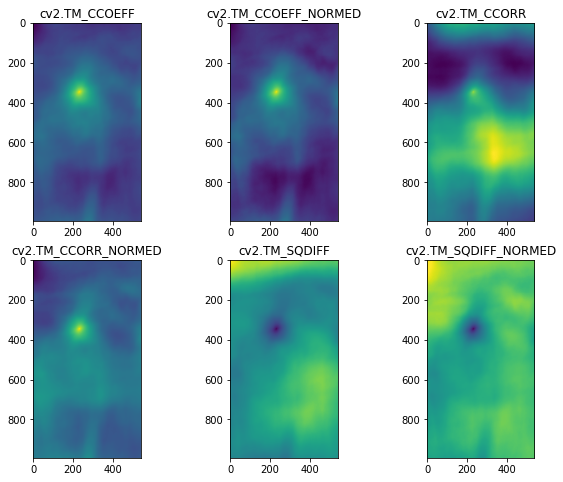

In [40]:
plt.figure(figsize=(10, 8))

# Sample output view.
res = cv2.matchTemplate(sammy, sammy_face, method=cv2.TM_CCOEFF)
# The image essentially a HEAT-MAP.
plt.subplot(2, 3, 1)
plt.imshow(res)
plt.title('cv2.TM_CCOEFF')

res = cv2.matchTemplate(sammy, sammy_face, method=cv2.TM_CCOEFF_NORMED)
plt.subplot(2, 3, 2)
plt.imshow(res)
plt.title('cv2.TM_CCOEFF_NORMED')

res = cv2.matchTemplate(sammy, sammy_face, method=cv2.TM_CCORR)
plt.subplot(2, 3, 3)
plt.imshow(res)
plt.title('cv2.TM_CCORR')

res = cv2.matchTemplate(sammy, sammy_face, method=cv2.TM_CCORR_NORMED)
plt.subplot(2, 3, 4)
plt.imshow(res)
plt.title('cv2.TM_CCORR_NORMED')

res = cv2.matchTemplate(sammy, sammy_face, method=cv2.TM_SQDIFF)
plt.subplot(2, 3, 5)
plt.imshow(res)
plt.title('cv2.TM_SQDIFF')

res = cv2.matchTemplate(image=sammy, templ=sammy_face, method=cv2.TM_SQDIFF_NORMED)
plt.subplot(2, 3, 6)
plt.imshow(res)
plt.title('cv2.TM_SQDIFF_NORMED')
# Except 'cv2.TM_SQDIFF' (Squared Difference) and 'cv2.TM_SQDIFF_NORMED' (Squared Difference normalize),
# other methods highlight the 'max' pixel values in the matching area. These two functions highlight
# the 'min' values in the matching area.